<a href="https://colab.research.google.com/github/shakeel0232/PythonCodeCNN/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import backend as K
from keras.engine.topology import Layer
#import ipdb;   ipdb.set_trace()
class MyLBP(Layer):
    def __init__(self, rank=None,kernel_size=None, strides=None,  padding='valid',activation=None, **kwargs):
   # def __init__(self, rank,kernel_size, strides,  padding='valid',activation=None, **kwargs):
        self.rank = rank
      #  self.output_dim = output_dim
        self.kernel_size = (kernel_size, rank,'kernel_size')
        self.strides =(strides, rank, 'strides')
        self.padding = (padding)
        self.activation = (activation)
        super(MyLBP, self).__init__(**kwargs)
        
        
def get_pixel(img, center, x, y):
    
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value
  
  
    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      power_val = [1, 2, 4, 8, 16, 32, 64, 128],
                                      new_value = 0,
                                      val = 0,
                                      val_ar=[],
                                      kernel_size=(3, 3),
                                     trainable=True)
        self.kernal_size=self.add_kernal_size(kernel_size=(3, 3))
        
        super(MyLBP, self).build(input_shape)  # Be sure to call this at the end

    def call(self, img):
      val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
      val_ar.append(get_pixel(img, center, x, y+1))       # right
      val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
      val_ar.append(get_pixel(img, center, x+1, y))       # bottom
      val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
      val_ar.append(get_pixel(img, center, x, y-1))       # left
      val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
      val_ar.append(get_pixel(img, center, x-1, y))
      val += val_ar[i] * power_val[i]
      return (val , self.kernel)
 
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

Using TensorFlow backend.


In [ ]:
def LeNet_Model():
   
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channel,)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(units=120, activation='relu'))
    model.add(layers.Dense(units=84, activation='relu'))
    model.add(layers.Dense(units=10, activation = 'softmax'))

    return model
def DBAP_Full_LeNet_Model():
   
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channel,)))
    model.add(MyLBP(6, kernel_size=(3,3),strides=(2,2)))
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(units=120, activation='relu'))
    model.add(layers.Dense(units=84, activation='relu'))
    model.add(layers.Dense(units=10, activation = 'softmax'))

    return model

def Pool_LeNet_Model():
   
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channel,)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(units=10, activation = 'softmax'))

    return model
  
def DBAP_LeNet_Model():
   
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channel,)))
    model.add(MyLBP(6, kernel_size=(3,3),strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=10, activation = 'softmax'))

    return model
  
def AlexNet_Model():
   
    model = keras.Sequential()
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

def DBAP_Full_AlexNet_Model():
   
    model = keras.Sequential()
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    model.add(MyLBP(96, kernel_size=(3,3),strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model
  
def Pool_AlexNet_Model():
   
    model = keras.Sequential()
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    return model
  
def DBAP_AlexNet_Model():
   
    model = keras.Sequential()
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    model.add(MyLBP(96, kernel_size=(3,3),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    return model



In [ ]:
model = LeNet_Model()
print(model.summary())

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 96)        960       
_________________________________________________________________
my_lbp_1 (MyLBP)             (None, 14, 14, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)       

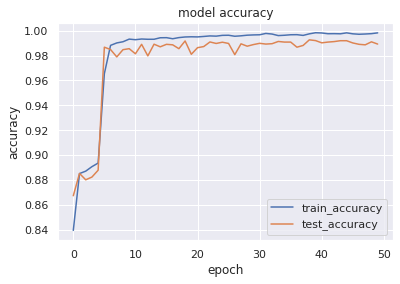

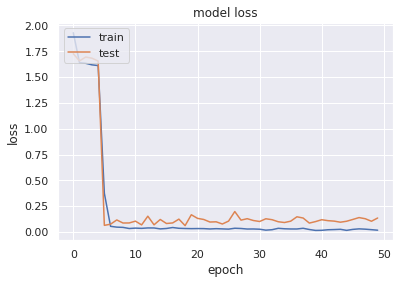

Batch_size: 256
Epochs: 50
Test loss: 0.13488496838050493
Accuracy on test data is:  98.92 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.97      0.98      1135
           2       0.99      1.00      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.96      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1100    0    1    0    1   31    1    1    0]
 [   1    0 1028    0    0    0    3    0 

In [ ]:
###############MNIST####################################
###############MNIST####################################

from __future__ import print_function
import keras
import numpy as np
from keras import optimizers

from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D,BatchNormalization,Dropout
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist
from keras.models import Sequential,Model
from keras import backend as K
import time
from sklearn.model_selection import train_test_split

import gzip
import pandas as pd
from time import time
import tensorflow as tf
import keras
import keras.layers as layers
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
mean          = [125.307, 122.95, 113.865]
std           = [62.9932, 62.0887, 66.7048]
batch_size = 256
num_classes = 10
epochs = 50

img_rows, img_cols = 28, 28
img_height=img_rows
img_width=img_cols
channel=1

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
for i in range(3):
        x_train[:,:,i] = (x_train[:,:,i] - mean[i]) / std[i]
        x_test[:,:,i] = (x_test[:,:,i] - mean[i]) / std[i]
      
model = DBAP_Full_AlexNet_Model()
print(model.summary())
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
#model.compile(loss=keras.losses.categorical_crossentropy,
 #             optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
  #            metrics=['accuracy'])
history_1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          #callbacks=[TensorBoardColabCallback(tbc)]        
                   )
#end = time.time()
score = model.evaluate(x_test, y_test, verbose=0)

import matplotlib.pyplot as plt
def show_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    
def show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_accuracy(history_1)
show_loss(history_1)


print('Batch_size:', batch_size)
print('Epochs:', epochs)
print('Test loss:', score[0])
#print ("Model took Time to train: ",(end - start)/60,"Mins")
print ("Accuracy on test data is: ",score[1]*100,"%")


##############Confusion Matrix###############################

from sklearn.metrics import classification_report,confusion_matrix
yPred=model.predict(x_test)
import numpy as np
yPred=np.argmax(yPred,axis=1)
prob=model.predict_classes(x_test)

tName=['0','1','2','3','4','5','6','7','8','9']
#tName=['0','1','2','3','4','5','6','7','8','9']
#tName=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
#tName=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(classification_report(np.argmax(y_test,axis=1),yPred,target_names=tName))
print(confusion_matrix(np.argmax(y_test,axis=1),yPred))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/Research/2020 March /AlexNet/Saved Models/AlexNet with DBAP softmax/

In [ ]:
ls

In [ ]:
#model.save('FC_LeNet_MNST.h5')
#model.save('Pool_LeNet_MNST.h5')
model.save('AlexNet_DBAP_MNIST_SOFTMAX.h5')

#model.save('FC_AlexNet_MNST.h5')
#model.save('Pool_AlexNet_MNST.h5')
#model.save('DBAP_AlexNet_MNST.h5')

In [ ]:
model_json = model.to_json()
with open("AlexNet_DBAP_MNIST_SOFTMAX.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("AlexNet_DBAP_MNIST_SOFTMAX_weights.h5")
print("Saved model to disk")
 


Saved model to disk


In [ ]:
# later...
 from keras.models import model_from_json
# load json and create model
json_file = open('AlexNet_DBAP_MNIST_SOFTMAX.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json,custom_objects={'MyLBP': MyLBP()})
# load weights into new model
loaded_model.load_weights("AlexNet_DBAP_MNIST_SOFTMAX_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
my_lbp_5 (MyLBP)             (None, 26, 26, 6)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4056)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                40570     
Total params: 40,630
Trainable params: 40,630
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['accuracy'])
loss, acc = loaded_model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 2s 211us/step
Restored model, accuracy: 97.94%


In [ ]:
from keras.models import Sequential
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy
custom_objects={'CRF': CRF,'crf_loss':crf_loss,'crf_viterbi_accuracy':crf_viterbi_accuracy}

ModuleNotFoundError: ignored

In [ ]:
predictions = model.predict(x_test)

In [ ]:
first_batch_loss = model.train_on_batch(x_train[:64], y_train[:64])

In [ ]:
print(first_batch_loss)

[0.3005438, 0.9375]


In [ ]:
model.load_weights('WDBAP_AlexNet_MNST.h5')


In [ ]:
new_first_batch_loss = model.train_on_batch(x_train[:64], y_train[:64])
assert first_batch_loss == new_first_batch_loss

AssertionError: ignored

In [ ]:

# Check that the model state has been preserved
new_predictions = model.predict(x_test)

In [ ]:
class ThreeLayerMLP(keras.Model):
  
  def __init__(self, name=None):
    super(ThreeLayerMLP, self).__init__(name=name)
    self.dense_1 = layers.Dense(64, activation='relu', name='dense_1')
    self.dense_2 = layers.Dense(64, activation='relu', name='dense_2')
    self.pred_layer = layers.Dense(10, activation='softmax', name='predictions')
    
  def call(self, inputs):
    x = self.dense_1(inputs)
    x = self.dense_2(x)
    return self.pred_layer(x)

def get_model():
  return ThreeLayerMLP(name='3_layer_mlp')

model = get_model()

In [ ]:
#model.save('FC_LeNet_MNST.h5')
#model.save('Pool_LeNet_MNST.h5')
model.save('DBAP_LeNet_MNST.h5')

#model.save('FC_AlexNet_MNST.h5')
#model.save('Pool_AlexNet_MNST.h5')
#model.save('DBAP_AlexNet_MNST.h5')

In [ ]:
model.load_weights('DBAP_LeNet_MNST.h5')

In [ ]:
import keras
load_model =keras.models.load_model('DBAP_LeNet_MNST.h5')
load_model.summary()

ValueError: ignored

In [ ]:
from keras.initializers import glorot_uniform

with CustomObjectScope({'MyLBP': MyLBP(rank=96,kernel_size=(3,3),strides=(2,2))}):
        model = load_model('DBAP_AlexNet_MNST.h5')

TypeError: ignored

In [ ]:
!pip update keras

ERROR: unknown command "update"


In [ ]:
from keras.models import load_model
model = load_model('DBAP_AlexNet_MNST.h5', custom_objects={'MyLBP': MyLBP(rank=96,kernel_size=(3,3),strides=(2,2))})

In [ ]:
from keras.utils import CustomObjectScope

with CustomObjectScope({'MyLBP': MyLBP(rank=96,kernel_size=(3,3),strides=(2,2))}):
    model = load_model('DBAP_AlexNet_MNST.h5')

TypeError: ignored

In [ ]:
loss, acc = loaded_model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

RuntimeError: ignored

In [ ]:
model_feat=loaded_model

NameError: ignored

In [ ]:
model_feat=model

In [ ]:
feat_test = model_feat.predict(x_test)
print(feat_test.shape)

(10000, 10)


In [ ]:
from sklearn.model_selection import train_test_split
x_train_1, x_train_2, y_train_1, y_test_2 = train_test_split(x_train, y_train, train_size=0.7)
predictions_1 = model_feat.predict(x_train_2)
prediction_test = model_feat.predict(x_test)
import numpy as np
x_train_2 = np.reshape(x_train_2, (x_train_2.shape[0], x_train_2.shape[1], x_train_2.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_test.shape[1] ,1))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# make models
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_16 = KNeighborsClassifier(n_neighbors=16)
knn_32 = KNeighborsClassifier(n_neighbors=32)

In [ ]:
knn_1.fit(predictions_1, y_test_2)
knn_2.fit(predictions_1, y_test_2)
knn_4.fit(predictions_1, y_test_2)
knn_8.fit(predictions_1, y_test_2)
knn_16.fit(predictions_1, y_test_2)
knn_32.fit(predictions_1, y_test_2)

# predict
kn_1_pr = knn_1.predict(prediction_test)
kn_2_pr = knn_2.predict(prediction_test)
kn_4_pr = knn_4.predict(prediction_test)
kn_8_pr = knn_8.predict(prediction_test)
kn_16_pr = knn_16.predict(prediction_test)
kn_32_pr = knn_32.predict(prediction_test)

In [ ]:
from sklearn.metrics import accuracy_score

for i in range(1,6):
    val = str(pow(2, i))
    eval("print(\"k=" + val + ":{}\".format(accuracy_score(kn_" + val + "_pr, y_test)))")
    #eval("print(\"k=" + val + ":{}\".format(accuracy_score(prediction_test.round(), y_test)))")

k=2:0.9897
k=4:0.9909
k=8:0.9907
k=16:0.9905
k=32:0.99


In [ ]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_5').output)

In [ ]:
feat_test = model_feat.predict(x_test)
print(feat_test.shape)

In [ ]:
from sklearn.svm import SVC

c1=0.0001
c2=0.001
c3=0.01
c4=0.1
c5=1.0
c6=10.0
c7=100.0
c8=1000.0

svm1 = SVC(C=c1,kernel='linear')
svm2 = SVC(C=c2,kernel='linear')
svm3 = SVC(C=c3,kernel='linear')
svm4 = SVC(C=c4,kernel='linear')
svm5 = SVC(C=c5,kernel='linear')
svm6 = SVC(C=c6,kernel='linear')
svm7 = SVC(C=c7,kernel='linear')
svm8 = SVC(C=c8,kernel='linear')

svm1.fit(feat_test,np.argmax(y_test,axis=1))
svm2.fit(feat_test,np.argmax(y_test,axis=1))
svm3.fit(feat_test,np.argmax(y_test,axis=1))
svm4.fit(feat_test,np.argmax(y_test,axis=1))
svm5.fit(feat_test,np.argmax(y_test,axis=1))
svm6.fit(feat_test,np.argmax(y_test,axis=1))
svm7.fit(feat_test,np.argmax(y_test,axis=1))
svm8.fit(feat_test,np.argmax(y_test,axis=1))


print('C =',c1,'acc =',svm1.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c2,'acc =',svm2.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c3,'acc =',svm3.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c4,'acc =',svm4.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c5,'acc =',svm5.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c6,'acc =',svm6.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c7,'acc =',svm7.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c8,'acc =',svm8.score(feat_test,np.argmax(y_test,axis=1))*100.0)


C = 0.0001 acc = 11.35
C = 0.001 acc = 98.92
C = 0.01 acc = 98.92
C = 0.1 acc = 98.92
C = 1.0 acc = 98.92999999999999
C = 10.0 acc = 98.96000000000001
C = 100.0 acc = 98.99
C = 1000.0 acc = 98.97


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=10)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

In [ ]:
feat_train = model_feat.predict(x_train)
print(feat_train.shape)

In [ ]:
feat_test = model_feat.predict(x_test)
print(feat_test.shape)

In [ ]:
feat_train = model_feat.predict(x_train)
print(feat_train.shape)

feat_val = model_feat.predict(x_val)
print(feat_val.shape)

feat_test = model_feat.predict(x_test)
print(feat_test.shape)

In [ ]:
svm.score(feat_train,np.argmax(y_train,axis=1))

In [ ]:
plt.savefig('books_read.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [ ]:
plt.savefig('foo.png', bbox_inches='tight')

In [ ]:
 show_loss(history_1)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=10)

In [ ]:
nsamples, nx, ny = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny))

In [ ]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_1').output)

In [ ]:
model_feat.summary()

In [ ]:
feat_val = model_feat.predict(x_val)
print(feat_val.shape)

In [ ]:
feat_test = model_feat.predict(x_test)
print(feat_test.shape)

In [ ]:
feat_train = model_feat.predict(x_train)
print(feat_train.shape)

In [ ]:
from sklearn.svm import SVC

svm = SVC(C=1.0,kernel='linear')

svm.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

In [ ]:
svm.score(feat_train,np.argmax(y_train,axis=1))

In [ ]:
svm.score(feat_val,np.argmax(y_val,axis=1))

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

In [ ]:
cd drive/My Drive/Colab Notebooks/18 June 2019/100EpochesPrecisonRecall/images


In [ ]:

# example of saving an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
# load image as as grayscale
img = load_img('CifarAlexAcc.png', color_mode = "grayscale")
# convert image to a numpy array
img_array = img_to_array(img)
# save the image with a new filename
save_img('CifarAlexAcc22.png', img_array)

In [ ]:
Pred_labels = svm.predict(feat_test)

In [ ]:
Pred_labels.shape

In [ ]:
test_id = []
test_id = pd.DataFrame(test_id, columns=['file'])

In [ ]:
Pred_labels = pd.DataFrame(Pred_labels,index =None,columns=['species_num'])

test_df = pd.DataFrame()
test_df['species_num'] = Pred_labels['species_num']
test_df['file'] = test_id['file']
test_df['species'] = [SPECIES[i] for i in Pred_labels['species_num']]

submission = pd.merge(left=sample_submission, right=test_df[['file', 'species']], on="file", how="right")
submission.drop(['species_x'], axis = 1, inplace = True)
submission.columns = ['file','species'] 
print(submission.head())

In [ ]:
#################%%%%%%%%%%%%%%%%%%%%%%%%SVM#################
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(d2_train_dataset, y_train) 

In [ ]:
d2_train_dataset.shape

In [ ]:
classifier=model
layer_outputs = [layer.output for layer in model.layers[:12]] 
from keras import models
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


img_path = 'vis_tensor_MNIST.png'
img = image.load_img(img_path, target_size=(img_height, img_width, channel), color_mode = "grayscale")
#img = image.load_img(img_path, target_size=(32, 32,1))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

activations = activation_model.predict(img_tensor) 


layer_names = []
for layer in classifier.layers[:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 6
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
from sklearn.model_selection import train_test_split
x_train_1, x_train_2, y_train_1, y_test_2 = train_test_split(x_train, y_train, train_size=0.7)
predictions_1 = history_1.model.predict(x_train_2)
prediction_test = history_1.model.predict(x_test)
import numpy as np
x_train_2 = np.reshape(x_train_2, (x_train_2.shape[0], x_train_2.shape[1], x_train_2.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_test.shape[1] ,1))

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
# make models
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_16 = KNeighborsClassifier(n_neighbors=16)
knn_32 = KNeighborsClassifier(n_neighbors=32)

knn_2.fit(predictions_1, y_test_2)
knn_4.fit(predictions_1, y_test_2)
knn_8.fit(predictions_1, y_test_2)
knn_16.fit(predictions_1, y_test_2)
knn_32.fit(predictions_1, y_test_2)

# predict
kn_2_pr = knn_2.predict(prediction_test)
kn_4_pr = knn_4.predict(prediction_test)
kn_8_pr = knn_8.predict(prediction_test)
kn_16_pr = knn_16.predict(prediction_test)
kn_32_pr = knn_32.predict(prediction_test)



In [ ]:
from sklearn.metrics import accuracy_score

for i in range(1,6):
    val = str(pow(2, i))
    eval("print(\"k=" + val + ":{}\".format(accuracy_score(kn_" + val + "_pr, y_test)))")
    #eval("print(\"k=" + val + ":{}\".format(accuracy_score(prediction_test.round(), y_test)))")

In [ ]:
ls

In [ ]:
import os
base_dir = 'base_dir2/abc.txt'
os.mkdir(base_dir)

In [ ]:
import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.gfile.MkDir(base_dir)

In [ ]:
from google.colab import files
files.download('abc.txt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

In [ ]:
cd /content/drive/My Drive/

In [ ]:
loss, acc = new_model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [ ]:
import keras
new_model = keras.models.load_model('MNISTAlexNet.h5')
new_model.summary()

In [ ]:
from keras.models import Sequential,Model
model_feat = Model(inputs=new_model.input,outputs=new_model.get_layer('max_pooling2d_7').output)

In [ ]:
model_feat.summary()

In [ ]:
print(x_test.shape)

In [ ]:
print(feat_test.shape)
print(y_test.shape)

In [ ]:
feat_test = feat_test.reshape(feat_test.shape[0], 7* 7* 96)

In [ ]:
print(feat_test.shape)

In [ ]:
feat_test = model_feat.predict(x_test)
print(feat_test.shape)

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
img_height=img_rows
img_width=img_cols
channel=1
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
y_test = keras.utils.to_categorical(y_test, 10)
y_train = keras.utils.to_categorical(y_train, 10)
input_shape = (img_rows, img_cols, 1)
#print(input_shape.shape)

In [ ]:
from sklearn.svm import SVC
import numpy as np
c1=0.0001
c2=0.001
c3=0.01
c4=0.1
c5=1.0
c6=10.0
c7=100.0
c8=1000.0

svm1 = SVC(C=c1,kernel='linear')
svm2 = SVC(C=c2,kernel='linear')
svm3 = SVC(C=c3,kernel='linear')
svm4 = SVC(C=c4,kernel='linear')
svm5 = SVC(C=c5,kernel='linear')
svm6 = SVC(C=c6,kernel='linear')
svm7 = SVC(C=c7,kernel='linear')
svm8 = SVC(C=c8,kernel='linear')

svm1.fit(feat_test,np.argmax(y_test,axis=1))
svm2.fit(feat_test,np.argmax(y_test,axis=1))
svm3.fit(feat_test,np.argmax(y_test,axis=1))
svm4.fit(feat_test,np.argmax(y_test,axis=1))
svm5.fit(feat_test,np.argmax(y_test,axis=1))
svm6.fit(feat_test,np.argmax(y_test,axis=1))
svm7.fit(feat_test,np.argmax(y_test,axis=1))
svm8.fit(feat_test,np.argmax(y_test,axis=1))


print('C =',c1,'acc =',svm1.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c2,'acc =',svm2.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c3,'acc =',svm3.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c4,'acc =',svm4.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c5,'acc =',svm5.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c6,'acc =',svm6.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c7,'acc =',svm7.score(feat_test,np.argmax(y_test,axis=1))*100.0)
print('C =',c8,'acc =',svm8.score(feat_test,np.argmax(y_test,axis=1))*100.0)


In [ ]:
print(x_train_2.shape)
print(x_test.shape)

print(predictions_1.shape)
print(y_test_2.shape)



In [ ]:
print(x_train_1.shape)
print(x_train_2.shape)

print(y_train_1.shape)
print(y_test_2.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_1, x_train_2, y_train_1, y_test_2 = train_test_split(x_train, y_train, train_size=0.7)
predictions_1 = model_feat.predict(x_train_2)
prediction_test = model_feat.predict(x_test)


In [ ]:
import numpy as np
x_train_2 = np.reshape(x_train_2, (x_train_2.shape[0], x_train_2.shape[1], x_train_2.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_test.shape[1] ,1))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# make models
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_16 = KNeighborsClassifier(n_neighbors=16)
knn_32 = KNeighborsClassifier(n_neighbors=32)

In [ ]:
knn_2.fit(predictions_1, x_train_2)

In [ ]:
knn_2.fit(predictions_1, y_test_2)
knn_4.fit(predictions_1, y_test_2)
knn_8.fit(predictions_1, y_test_2)
knn_16.fit(predictions_1, y_test_2)
knn_32.fit(predictions_1, y_test_2)

# predict
kn_2_pr = knn_2.predict(prediction_test)
kn_4_pr = knn_4.predict(prediction_test)
kn_8_pr = knn_8.predict(prediction_test)
kn_16_pr = knn_16.predict(prediction_test)
kn_32_pr = knn_32.predict(prediction_test)

In [ ]:
from sklearn.metrics import accuracy_score

for i in range(1,6):
    val = str(pow(2, i))
    eval("print(\"k=" + val + ":{}\".format(accuracy_score(kn_" + val + "_pr, y_test)))")
    #eval("print(\"k=" + val + ":{}\".format(accuracy_score(prediction_test.round(), y_test)))")